In [1]:
import nltk

#### POS tags

In [2]:
nltk.help.upenn_tagset('CC')

CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet


In [3]:
nltk.help.upenn_tagset('CD')

CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...


In [4]:
nltk.help.upenn_tagset('IN')

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


In [5]:
nltk.help.upenn_tagset('JJ')

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [6]:
nltk.help.upenn_tagset('MD')

MD: modal auxiliary
    can cannot could couldn't dare may might must need ought shall should
    shouldn't will would


In [7]:
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [8]:
nltk.help.upenn_tagset('POS')

POS: genitive marker
    ' 's


In [9]:
nltk.help.upenn_tagset('PRP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


In [10]:
nltk.help.upenn_tagset('RB')

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


In [13]:
nltk.help.upenn_tagset('SYM')

SYM: symbol
    % & ' '' ''. ) ). * + ,. < = > @ A[fj] U.S U.S.S.R * ** ***


In [14]:
nltk.help.upenn_tagset('VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


#### POS tagging with nltk

In [11]:
text11 = "Children shouldn't drink a sugary drink before bed."

In [12]:
text13 = nltk.word_tokenize(text11)
print(nltk.pos_tag(text13)) # runs on tokenized form

[('Children', 'NNP'), ('should', 'MD'), ("n't", 'RB'), ('drink', 'VB'), ('a', 'DT'), ('sugary', 'JJ'), ('drink', 'NN'), ('before', 'IN'), ('bed', 'NN'), ('.', '.')]


Ambiguity in POS tagging

In [13]:
text14 = nltk.pos_tag(nltk.word_tokenize("Visiting aunts can be a nuisance"))
text14

[('Visiting', 'VBG'),
 ('aunts', 'NNS'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('nuisance', 'NN')]

In [25]:
# ('Visiting', 'VBG') could be an adjective 'JJ'
nltk.help.upenn_tagset('VBG')

VBG: verb, present participle or gerund
    telegraphing stirring focusing angering judging stalling lactating
    hankerin' alleging veering capping approaching traveling besieging
    encrypting interrupting erasing wincing ...


#### Parsing sentence structure

Create a context-free grammar

In [14]:
text15 = nltk.word_tokenize("Alice loves Bob")
grammar = nltk.CFG.fromstring("""
S -> NP VP
VP -> V NP
NP -> 'Alice' | 'Bob' | 'John' | 'Mary'
V -> 'loves'
""")

In [15]:
parser = nltk.ChartParser(grammar)

trees = parser.parse_all(text15)
trees = parser.parse_all(nltk.word_tokenize('John loves Mary'))

for tree in trees:
    print(tree)

(S (NP John) (VP (V loves) (NP Mary)))


In [17]:
trees

[Tree('S', [Tree('NP', ['John']), Tree('VP', [Tree('V', ['loves']), Tree('NP', ['Mary'])])])]

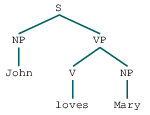

In [18]:
tree

In [32]:
parser

Ambiguity in parsing "I saw the man with a telescope"

In [19]:
text16 = nltk.word_tokenize("I saw the man with a telescope")

In [20]:
grammar1 = nltk.data.load('./grammar.cfg')
grammar1

<Grammar with 13 productions>

In [22]:
parser = nltk.ChartParser(grammar1)
trees = parser.parse_all(text16)
trees

[Tree('S', [Tree('NP', ['I']), Tree('VP', [Tree('VP', [Tree('V', ['saw']), Tree('NP', [Tree('Det', ['the']), Tree('N', ['man'])])]), Tree('PP', [Tree('P', ['with']), Tree('NP', [Tree('Det', ['a']), Tree('N', ['telescope'])])])])]),
 Tree('S', [Tree('NP', ['I']), Tree('VP', [Tree('V', ['saw']), Tree('NP', [Tree('Det', ['the']), Tree('N', ['man']), Tree('PP', [Tree('P', ['with']), Tree('NP', [Tree('Det', ['a']), Tree('N', ['telescope'])])])])])])]

In [23]:
for tree in trees:
    print(tree)

(S
  (NP I)
  (VP
    (VP (V saw) (NP (Det the) (N man)))
    (PP (P with) (NP (Det a) (N telescope)))))
(S
  (NP I)
  (VP
    (V saw)
    (NP (Det the) (N man) (PP (P with) (NP (Det a) (N telescope))))))


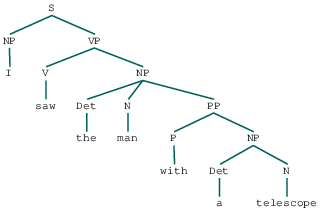

In [24]:
tree

In [25]:
len(trees)

2

In [26]:
tree[0]

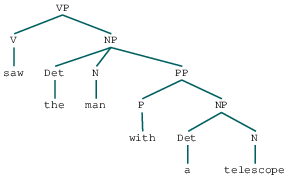

In [27]:
tree[1]

#### Wall street journal Tree bank for pre-parsed sentences

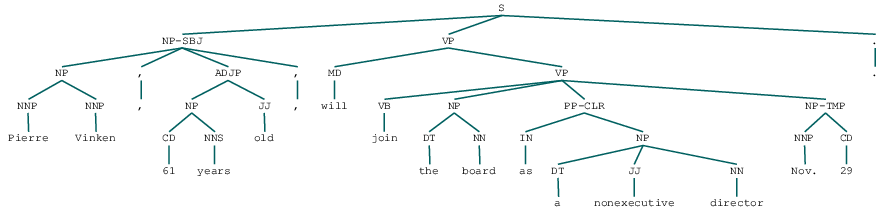

In [28]:
from nltk.corpus import treebank
text17 = treebank.parsed_sents('wsj_0001.mrg')[0]
text17

In [54]:
print(text17)

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))
